# Visualizing the History of Nobel Prize Winners

In [14]:
library(tidyverse)
library(readr)
library(ggplot2)

### Load the dataset and find the most common gender and birth country

In [15]:
nobel <- read_csv('data/nobel.csv')

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 1000 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (14): category, prize, motivation, prize_share, laureate_type, full_nam...
dbl   (2): year, laureate_id
date  (2): birth_date, death_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [16]:
nobel %>%
    group_by(sex) %>%
    count() %>%
	arrange(desc(n))

top_gender <- "Male"

nobel %>%
    group_by(birth_country) %>%
    count()  %>% 
    arrange(desc(n))  %>% 
    head(20)

top_country <- "United States of America"

New names:
• `` -> `...1`


sex,n
<chr>,<int>
Male,905
Female,65
NA,30


New names:
• `` -> `...1`


birth_country,n
<chr>,<int>
United States of America,291
United Kingdom,91
Germany,67
France,58
Sweden,30
NA,30
Japan,28
Canada,21
Netherlands,19


In [17]:
cat("The gender with the most Nobel laureates is:", top_gender, "\n")
cat("The most common birth country of Nobel laureates is:", top_country, "\n")

The gender with the most Nobel laureates is: Male 
The most common birth country of Nobel laureates is: United States of America 


### Identify the decade with the highest proportion of US-born winners

In [18]:
prop_usa_winners <- nobel %>% 
    mutate(usa_born_winner = birth_country == "United States of America",
           decade = floor(year / 10) * 10 ) %>% 
    group_by(decade) %>%
    summarize(proportion = mean(usa_born_winner, na.rm = TRUE))

In [19]:
max_decade_usa <- "2000"

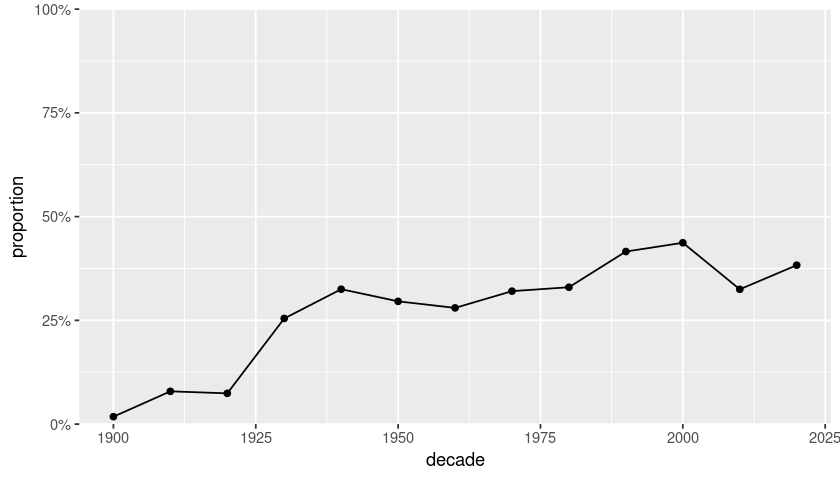

In [20]:
options(repr.plot.width=7, repr.plot.height=4)

ggplot(prop_usa_winners, aes(decade, proportion)) +
    geom_line() + geom_point() +
    scale_y_continuous(labels = scales::percent, limits = 0:1, expand = c(0,0))

### Find the decade and category with the highest proportion of female laureates

In [21]:
prop_female_winners <- nobel %>%
    mutate(female_winner = sex == "Female",
           decade = floor(year / 10) * 10) %>%
    group_by(decade, category) %>%
    summarize(proportion = mean(female_winner))

`summarise()` has grouped output by 'decade'. You can override using the
`.groups` argument.


In [22]:
max_female_list <- list(decade = "2020",
                        category = "Literature")

Warning message:
“Removed 12 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 12 rows containing missing values or values outside the scale range
(`geom_point()`).”


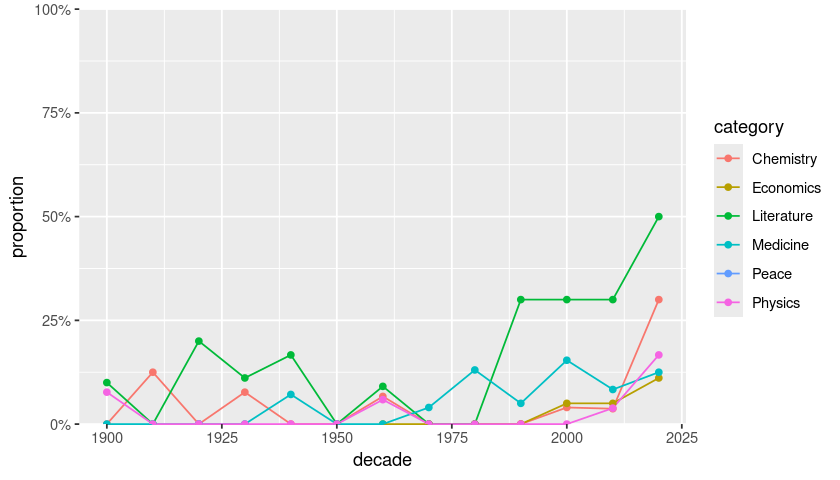

In [23]:
ggplot(prop_female_winners, aes(decade, proportion, color = category)) +
    geom_line() + geom_point() +
    scale_y_continuous(labels = scales::percent, limits = 0:1, expand = c(0,0))

### Find first woman to win a Nobel Prize

In [24]:
first_woman <- nobel %>%
    filter(sex == "Female") %>%
    top_n(1, desc(year))

first_woman_name <- first_woman$full_name
first_woman_category <- first_woman$category

In [25]:
cat(sprintf("The first woman to win a Nobel Prize was %s, in the category of %s.\n", first_woman_name, first_woman_category))

The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.


### Determine repeat winners

In [26]:
repeats <- nobel %>%
    group_by(full_name) %>% 
    count()  %>% 
    filter(n >= 2)

repeats

New names:
• `` -> `...1`


full_name,n
<chr>,<int>
Comité international de la Croix Rouge (International Committee of the Red Cross),3
Frederick Sanger,2
John Bardeen,2
Linus Carl Pauling,2
"Marie Curie, née Sklodowska",2
Office of the United Nations High Commissioner for Refugees (UNHCR),2
